In [1]:
from Backend import read_dna_seq, dna
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
seqs = read_dna_seq('SouthAsia.fasta')

In [3]:
DNA = {}
for key in seqs.keys():
  d = dna(seqs[key])
  date = d.date
  feature = d.extract()
  DNA[key] = [date,feature]

In [4]:
X = []
Dates = []
for key in DNA.keys():
  Dates.append(DNA[key][0])
  X.append(DNA[key][1])
X = np.array(X)

In [5]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X)
km = KMeans(2)
predictions = km.fit_predict(X_t).copy()

In [6]:
x = np.array([X_t[i][0] for i in range(len(X))])
y = np.array([X_t[i][1] for i in range(len(X))])
x_0 = x[predictions==0]
x_1 = x[predictions==1]
y_0 = y[predictions==0]
y_1 = y[predictions==1]

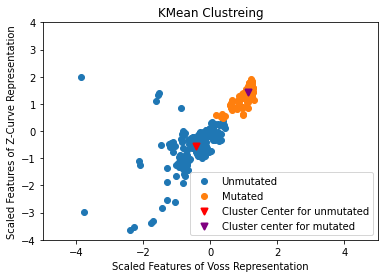

In [7]:
plt.scatter(x_0,y_0)
plt.scatter(x_1,y_1)
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1], c='red',  marker='v', linewidths=2)
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1], c='purple', marker='v', linewidths=2)
plt.legend(('Unmutated','Mutated','Cluster Center for unmutated', 'Cluster center for mutated'))
plt.xlim(-5,5)
plt.ylim(-4,4)
plt.title('KMean Clustreing')
plt.xlabel('Scaled Features of Voss Representation')
plt.ylabel('Scaled Features of Z-Curve Representation')
plt.savefig('KMeans_SouthAsia.jpg')

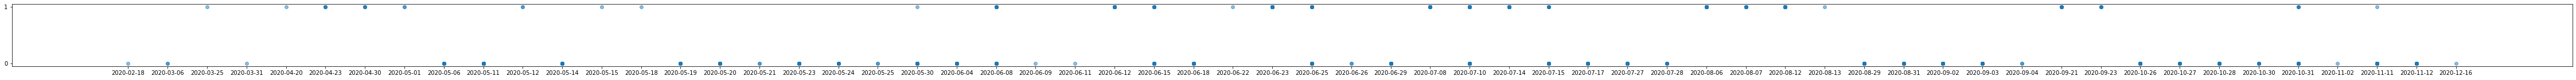

In [8]:
fig = plt.figure(figsize=(80,2))
ax = fig.add_subplot(111)
plt.yticks(np.arange(0,2,1))
ax.scatter(Dates,predictions,alpha =0.5)
plt.savefig('Kmeans_SouthAsia_Timeline')

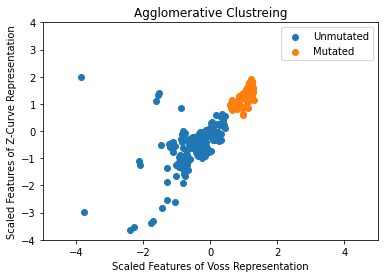

In [9]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(2)

predictions = ag.fit_predict(X_t).copy()
x_0 = x[predictions==0]
x_1 = x[predictions==1]
y_0 = y[predictions==0]
y_1 = y[predictions==1]
plt.scatter(x_0,y_0)
plt.scatter(x_1,y_1)
plt.xlim(-5,5)
plt.ylim(-4,4)
plt.title('Agglomerative Clustreing')
plt.xlabel('Scaled Features of Voss Representation')
plt.ylabel('Scaled Features of Z-Curve Representation')
plt.legend(('Unmutated','Mutated'))
plt.savefig('Agglomerative_SouthAsia.jpg')

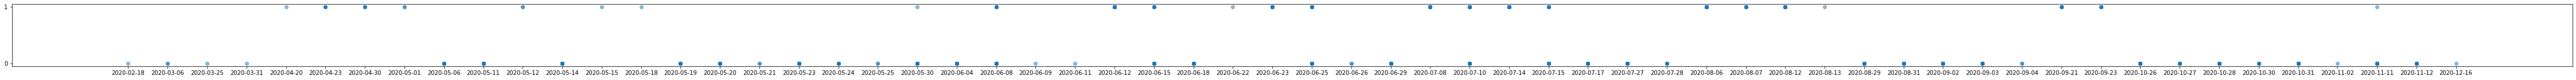

In [10]:
fig = plt.figure(figsize=(80,2))
ax = fig.add_subplot(111)
plt.yticks(np.arange(0,2,1))
ax.scatter(Dates,predictions,alpha =0.5)
plt.savefig('Agglomerative_SouthAsia_Timeline')